### Applied Data Science Week 6: Pandas

![](../ads_ohours_cover.png)

#### The `DataFrame`

![](https://pandas.pydata.org/docs/_images/01_table_dataframe1.svg)

In [1]:
import pandas as pd

In [4]:
df = pd.DataFrame({'names': ['jacob', 'hardy'],
                  'ages': ['1, 2, 3', '4, 5, 6']})

In [11]:
ages = df['ages'].str.split()

In [12]:
names = df['names']

In [26]:
ages = df['ages'].str.split(',')

In [46]:
l = []
for name, age in zip(names, ages):
    #print(name, age)
    res = [(name, a) for a in age]
    l.append(res)

In [50]:
import seaborn as sns

In [51]:
penguins = sns.load_dataset('penguins')

In [52]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [53]:
sex_dict = {'MALE': 0, 'FEMALE': 1}

In [56]:
penguins['sex'] = penguins['sex'].map(sex_dict)

In [57]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1.0
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1.0


In [60]:
penguins.groupby('island').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,
Biscoe,45.257485,15.874850,209.706587,4716.017964,0.490798
Dream,44.167742,18.344355,193.072581,3712.903226,0.495935
Torgersen,38.950980,18.429412,191.196078,3706.372549,0.510638


In [63]:
is_df = penguins.groupby(['island', 'sex']).mean()

In [65]:
is_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, ('Biscoe', 0.0) to ('Torgersen', 1.0)
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     6 non-null      float64
 1   bill_depth_mm      6 non-null      float64
 2   flipper_length_mm  6 non-null      float64
 3   body_mass_g        6 non-null      float64
dtypes: float64(4)
memory usage: 351.0+ bytes


In [67]:
is_df.unstack()

bill_length_mm            bill_depth_mm             \
sex                  0.0        1.0           0.0        1.0   
island                                                         
Biscoe         47.119277  43.307500     16.597590  15.191250   
Dream          46.116129  42.296721     19.066129  17.601639   
Torgersen      40.586957  37.554167     19.391304  17.550000   

          flipper_length_mm              body_mass_g               
sex                     0.0         1.0          0.0          1.0  
island                                                             
Biscoe           213.289157  205.687500  5104.518072  4319.375000  
Dream            196.306452  190.016393  3987.096774  3446.311475  
Torgersen        194.913043  188.291667  4034.782609  3395.833333

<AxesSubplot:xlabel='sex'>

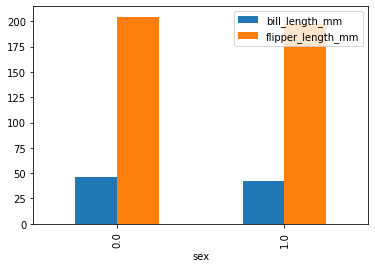

In [69]:
penguins.groupby('sex')[['bill_length_mm', 'flipper_length_mm']].mean().plot(kind = 'bar')

In [78]:
groups = penguins.groupby('sex')[['bill_length_mm']]

In [82]:
groups.agg(['mean', 'std', 'count', 'median', 'max', 'min'])

bill_length_mm                                   
              mean       std count median   max   min
sex                                                  
0.0      45.854762  5.366896   168   46.8  59.6  34.6
1.0      42.096970  4.903476   165   42.8  58.0  32.1

In [84]:
penguins.groupby(penguins['flipper_length_mm'] > 185).mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
flipper_length_mm,,,,,
False,39.048780,17.870732,181.585366,3475.000000,0.666667
True,44.585714,17.053156,203.548173,4300.747508,0.472789


In [70]:
penguins.loc[(penguins['flipper_length_mm'] > 185) & (penguins['sex'] == 1.0)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1.0
16,Adelie,Torgersen,38.7,19.0,195.0,3450.0,1.0
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,1.0
...,...,...,...,...,...,...,...
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,1.0
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,1.0
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1.0


In [71]:
def word_length(text):
    return len(text)

In [73]:
penguins['island'].apply(word_length)

0      9
1      9
2      9
3      9
4      9
      ..
339    6
340    6
341    6
342    6
343    6
Name: island, Length: 344, dtype: int64